In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import smooth_signal
from utils import Scale

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 10
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

12960


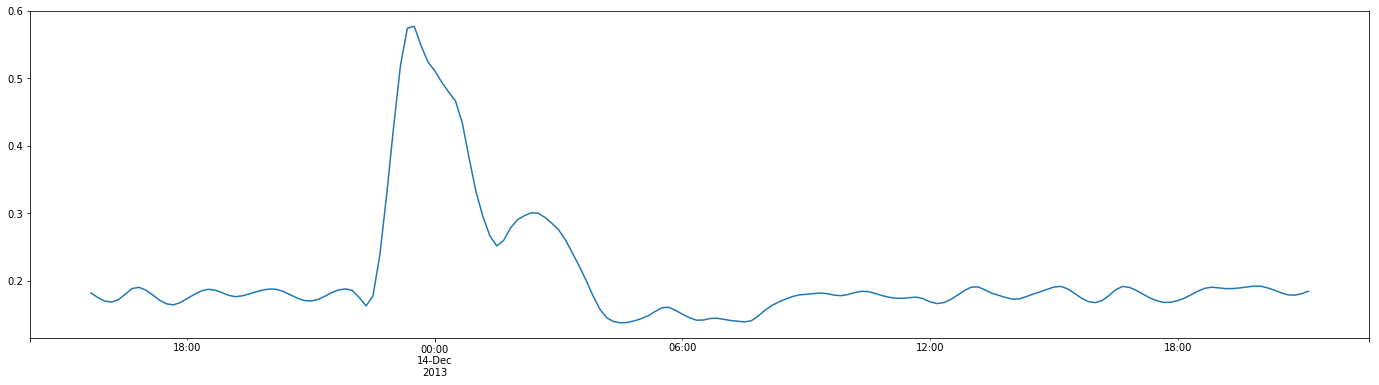

In [2]:
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
s4 = df_series_s4['sj2']
print(len(s4))
s4[1822:2000].plot(figsize=(24,6))

In [3]:
s4['2013/12/14 00:00:00']

0.5112145709211926

In [4]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
vtec = df_series_vtec['sj2']
vtec_pi = df_series_vtec['25']
vtec_bsa = df_series_vtec['bsa']

gvtec_pi = vtec - vtec_pi
gvtec_bsa = vtec - vtec_bsa

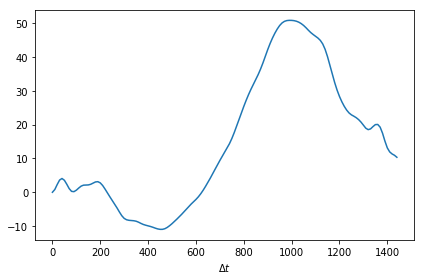

In [5]:
df = pd.DataFrame(index=vtec.index.values)
list_df = []

for i in range(0, 145):
    vtec_lag = vtec.shift(i)
    vtec_dt = vtec - vtec_lag
    df['vtec_' + str(i)] = vtec_dt.values
    list_df.append(10*i)
    
array_df = np.array(list_df)
df = df.dropna()

df.head()

array_y = df.loc['2013/12/14 00:00:00'].values
#fig = plt.figure(figsize=(18, 8));
#ax = fig.add_axes([0., 0., 1., 1.])
plt.xlabel(r'$\Delta{t}$')
plt.plot(array_df, array_y)
plt.tight_layout()
plt.savefig('./images/fin_dif_vtec.eps', format='eps', dpi=1000)

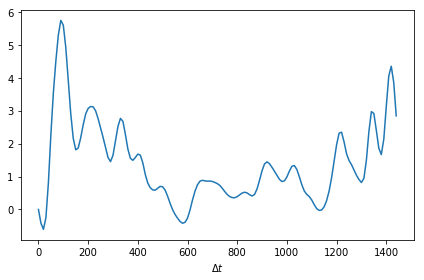

In [6]:
df_gvtec_pi = pd.DataFrame(index=gvtec_pi.index.values)
list_df = []

for i in range(0, 145):
    gvtec_pi_lag = gvtec_pi.shift(i)
    gvtec_pi_dt = gvtec_pi - gvtec_pi_lag
    df_gvtec_pi['gvtec_pi_' + str(i)] = gvtec_pi_dt.values
    list_df.append(10*i)
    
array_df = np.array(list_df)
df_gvtec_pi = df_gvtec_pi.dropna()

df_gvtec_pi.head()

array_y = df_gvtec_pi.loc['2013/12/14 00:00:00'].values
#fig = plt.figure(figsize=(18, 8));
#ax = fig.add_axes([0., 0., 1., 1.])
plt.xlabel(r'$\Delta{t}$')
plt.plot(array_df, array_y)
plt.tight_layout()
plt.savefig('./images/fin_dif_gvtec1.eps', format='eps', dpi=1000)

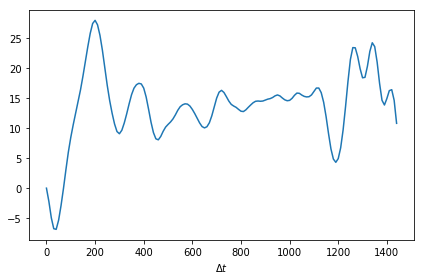

In [7]:
df_gvtec_bsa = pd.DataFrame(index=gvtec_pi.index.values)
list_df = []

for i in range(0, 145):
    gvtec_bsa_lag = gvtec_bsa.shift(i)
    gvtec_bsa_dt = gvtec_bsa - gvtec_bsa_lag
    df_gvtec_bsa['gvtec_bsa_' + str(i)] = gvtec_bsa_dt.values
    list_df.append(10*i)
    
array_df = np.array(list_df)
df_gvtec_bsa = df_gvtec_bsa.dropna()

df_gvtec_bsa.head()

array_y = df_gvtec_bsa.loc['2013/12/14 00:00:00'].values
#fig = plt.figure(figsize=(18, 8));
#ax = fig.add_axes([0., 0., 1., 1.])
plt.plot(array_df, array_y)
plt.xlabel(r'$\Delta{t}$')
plt.tight_layout()
plt.savefig('./images/fin_dif_gvtec2.eps', format='eps', dpi=1000)